In [4]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [5]:
df = pd.read_csv('normalizee_ws(2).csv')
print(df.head(3))

   Unnamed: 0       age  hypertension  heart_disease  avg_glucose_level  \
0       22061  0.112685      -0.54866      -0.452904          -0.622815   
1       14409 -0.658499      -0.54866      -0.452904          -0.665488   
2        9677 -2.476291      -0.54866      -0.452904          -0.307997   

        bmi   smoking_status  Male  married  urban  children  Private  \
0 -0.495936     never smoked   0.0      1.0    0.0         0      1.0   
1 -0.775325  formerly smoked   1.0      1.0    1.0         0      1.0   
2 -1.744967     never smoked   0.0      0.0    1.0         0      1.0   

   Self-employed  Govt_job  Never_worked  stroke  
0            0.0       0.0             0       0  
1            0.0       0.0             0       1  
2            0.0       0.0             0       0  


In [6]:
df['never_smoked'] = 0
df['formerly_smoked'] = 0
df['smokes'] = 0
for i in range(0, len(df.index)):
    if df.iloc[i]['smoking_status'] == 'never smoked':
        df.loc[i,'never_smoked'] = 1
    if df.iloc[i]['smoking_status'] == 'formerly smoked':
        df.loc[i,'formerly_smoked'] = 1
    if df.iloc[i]['smoking_status'] == 'smokes':
        df.loc[i,'smokes'] = 1
df = df.drop('smoking_status', axis=1)


In [23]:
df.to_csv("normalizevp.csv")


Training Features Shape: (47152, 18)
Training Labels Shape: (47152,)
Testing Features Shape: (11788, 18)
Testing Labels Shape: (11788,)
training ------------------------------------------
Coefficients = 

C:\Users\venky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 [[-7.01219774e-05  9.46620136e-05  1.72560643e-02  6.56123535e-03
   8.26990817e-03  7.28836208e-03 -1.09905291e-03 -3.66446988e-03
  -6.50248640e-03 -5.29472685e-03 -4.20919539e-04 -7.71791214e-03
  -6.93744599e-04 -1.39967590e-03 -6.50097427e-05 -5.95540717e-03
  -9.38262140e-04 -3.80186543e-03]]
Intercept =  [-0.01069553]
Accuracy 0.7888530709195792
Confusion = [[15730  7893]
 [ 2063 21466]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     23623
           1       0.73      0.91      0.81     23529

   micro avg       0.79      0.79      0.79     47152
   macro avg       0.81      0.79      0.79     47152
weighted avg       0.81      0.79      0.79     47152

AUC: 0.789


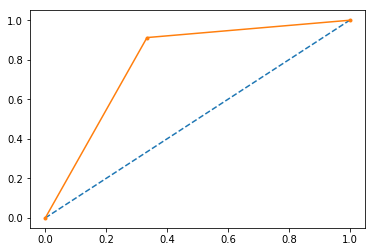

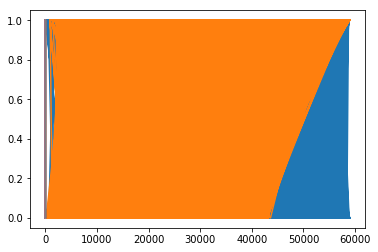

testing----------------------------------------------
Coefficients =  [[-7.01219774e-05  9.46620136e-05  1.72560643e-02  6.56123535e-03
   8.26990817e-03  7.28836208e-03 -1.09905291e-03 -3.66446988e-03
  -6.50248640e-03 -5.29472685e-03 -4.20919539e-04 -7.71791214e-03
  -6.93744599e-04 -1.39967590e-03 -6.50097427e-05 -5.95540717e-03
  -9.38262140e-04 -3.80186543e-03]]
Intercept =  [-0.01069553]
Accuracy 0.7870715982354938
Confusion = [[3851 1996]
 [ 514 5427]]
              precision    recall  f1-score   support

           0       0.88      0.66      0.75      5847
           1       0.73      0.91      0.81      5941

   micro avg       0.79      0.79      0.79     11788
   macro avg       0.81      0.79      0.78     11788
weighted avg       0.81      0.79      0.78     11788

AUC: 0.786


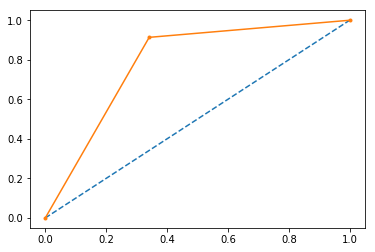

In [24]:
#Logistic Regression
df = pd.read_csv('normalizevp.csv')
features = df
labels = np.array(features['stroke'])
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 20)


train_features = train_features.drop('stroke',axis=1)
test_features = test_features.drop('stroke',axis=1)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

#print(train_labels)
lr = LogisticRegression()
lr.fit(train_features, train_labels)

print("training ------------------------------------------")

y_pred = lr.predict(train_features)
print('Coefficients = ', lr.coef_)
print('Intercept = ', lr.intercept_)
print('Accuracy {}'.format(lr.score(train_features, train_labels)))
print('Confusion = {}'.format(metrics.confusion_matrix(train_labels, y_pred)))
print(classification_report(train_labels, y_pred))

auc = roc_auc_score(train_labels, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


pyplot.plot(train_features,y_pred)
pyplot.show()



print("testing----------------------------------------------")

y_pred = lr.predict(test_features)
print('Coefficients = ', lr.coef_)
print('Intercept = ', lr.intercept_)
print('Accuracy {}'.format(lr.score(test_features, test_labels)))
print('Confusion = {}'.format(metrics.confusion_matrix(test_labels, y_pred)))
print(classification_report(test_labels, y_pred))

auc = roc_auc_score(test_labels, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()



Training Features Shape: (29470, 17)
Training Labels Shape: (29470,)
Testing Features Shape: (29470, 17)
Testing Labels Shape: (29470,)
Analysis of Training Dataset
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy= 1.0
AUC: 1.000


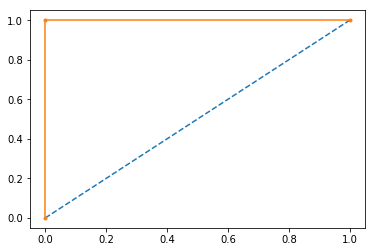

In [25]:
#Decision Tree Classification
from sklearn import tree
import graphviz


features = df
labels = np.array(features['stroke'])
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.50, random_state = 25)


train_features = train_features.drop('stroke',axis=1).drop('id',axis=1)
test_features = test_features.drop('stroke',axis=1).drop('id',axis=1)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

#Training Accuracy
clf = tree.DecisionTreeClassifier(criterion='gini',splitter='best')
clf = clf.fit(train_features, train_labels)
y_pred = clf.predict(train_features)

print("Analysis of Training Dataset")
print(clf)
print('Accuracy= {}'.format(metrics.accuracy_score(y_pred,train_labels)))

auc = roc_auc_score(train_labels, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()



In [26]:
print('Confusion Matrix')
print('{}'.format(metrics.confusion_matrix(y_pred,train_labels)))

Confusion Matrix
[[14691     0]
 [    0 14779]]


Analysis of Testing Dataset
Accuracy = 0.9387173396674584
Confusion Matrix
[[13849   876]
 [  930 13815]]
AUC: 0.939


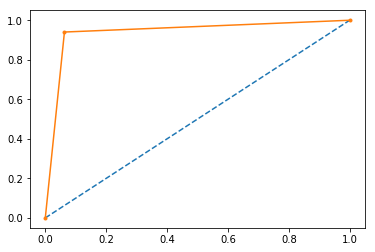

In [27]:
y_pred = clf.predict(test_features)
print('Analysis of Testing Dataset')
print('Accuracy = {}'.format(metrics.accuracy_score(y_pred,test_labels)))
print('Confusion Matrix')
print('{}'.format(metrics.confusion_matrix(y_pred,test_labels)))

auc = roc_auc_score(test_labels, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['id','age','hypertension','heart_disease','avg_glucose_level','bmi','Male','married','urban','children','Private','Self-employed','Govt_job','Never_worked','never_smoked','smokes','formerly_smoked'],
                                class_names=['stroke','no stroke'],filled=True,special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render("stroke-risk")

In [30]:
graph.render("stroke_ws")

'stroke_ws.pdf'

Training Features Shape: (47152, 17)
Training Labels Shape: (47152,)
Testing Features Shape: (11788, 17)
Testing Labels Shape: (11788,)

Accuracy = 0.7852477095351205
Confusion
[[16898  3466]
 [ 6660 20128]]
AUC: 0.785


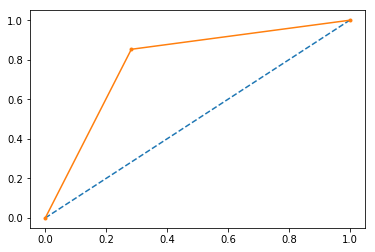

In [31]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
features = df
labels = np.array(features['stroke'])
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 25)


train_features = train_features.drop('stroke',axis=1).drop('id',axis=1)
test_features = test_features.drop('stroke',axis=1).drop('id',axis=1)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

gnb = GaussianNB()
gnb.fit(train_features,train_labels)
y_pred = gnb.predict(train_features)

y1_pred = gnb.predict(test_features)
print()

#training accuracy
print('Accuracy = {}'.format(metrics.accuracy_score(y_pred,train_labels)))
print('Confusion')
print('{}'.format(metrics.confusion_matrix(y_pred, train_labels,[0,1])))

auc = roc_auc_score(train_labels, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


Accuracy = 0.7796912114014252
Confusion
[[4138  823]
 [1774 5053]]
AUC: 0.780


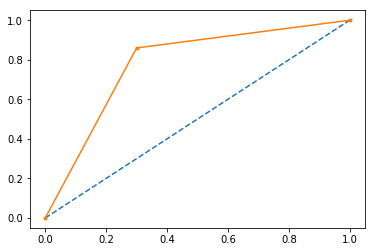

In [32]:
#testing accuracy
print('Accuracy = {}'.format(metrics.accuracy_score(y1_pred,test_labels)))
print('Confusion')
print('{}'.format(metrics.confusion_matrix(y1_pred, test_labels,[0,1])))

auc = roc_auc_score(test_labels, y1_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, y1_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()



In [33]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(train_features,train_labels)
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)
print('Mean Absolute Error: ',round(np.mean(errors),21))

psum = sum(np.round(predictions))
tsum = sum(test_labels)
if psum > tsum:
    err = psum - tsum 
    accuracy = (1 - (err/tsum))*100
    print("Accuracy:", round(accuracy,2),'%.')
else:
    err = tsum - psum
    accuracy = (1-err/tsum)*100
    print('Accuracy:',round(accuracy,2),'%.')

Mean Absolute Error:  0.06486511706820497
Accuracy: 98.43 %.


AUC: 0.994


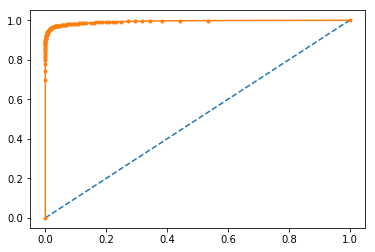

In [34]:
auc = roc_auc_score(test_labels, predictions)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [36]:


# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(train_features, train_labels)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file=None, 
                feature_names = ['id','age','hypertension','heart_disease','avg_glucose_level','bmi','Male','married','urban','children','Private','Self-employed','Govt_job','Never_worked','never_smoked','smokes','formerly_smoked'],
                class_names=['stroke','no stroke'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


graph = graphviz.Source(dot_data)
graph.render("stroke-risk2ws")


'stroke-risk2ws.pdf'